In [1]:
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt 
from collections import Counter
from datetime import date, datetime, timedelta
import time

/Users/nadiaaitmada/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
# Composants
link_compo = '/Users/nadiaaitmada/Desktop/Wild/projet3/composants_2024-06-02.csv'
df_compo = pd.read_csv(link_compo)
df_compo.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362


In [3]:
df_compo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ref_compo          10440 non-null  object 
 1   categorie          10440 non-null  object 
 2   aero               10440 non-null  object 
 3   desc               10440 non-null  object 
 4   lifespan           10440 non-null  int64  
 5   taux_usure_actuel  10440 non-null  float64
 6   cout               10440 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 571.1+ KB


In [4]:
df_compo.describe()

,lifespan,taux_usure_actuel,cout
count,10440.000000,10440.000000,10440.000000
mean,13571.933333,31.112570,11420.044444
std,8481.014582,17.292379,5763.304270
min,10023.000000,0.070000,2021.000000
25%,11015.000000,16.347733,4801.000000
50%,12643.000000,31.151386,12664.000000
75%,13626.000000,45.947890,16266.000000
max,68978.000000,68.910930,19492.000000


In [5]:
df_compo.isna().sum()

ref_compo            0
categorie            0
aero                 0
desc                 0
lifespan             0
taux_usure_actuel    0
cout                 0
dtype: int64

In [13]:
# dataset composant à l'origine 
## contient 10 440 lignes et 7 colonnes => print(df_aero.shape)
## Aucune ligne dupliquée => df_compo.duplicated().value_counts()
## 45 Composants en doublon => df_compo.duplicated(subset="ref_compo").value_counts() 
## Aucune valeur null  => df_compo.isna().sum()  

# I. Transformation du jeu de données
## 1. Gestion des doublons
### a. Identifier les composants en doublon 
df_compo.loc[df_compo.duplicated(subset="ref_compo") == True][['ref_compo','taux_usure_actuel']]

### b. Garder les doublons qui ont le taux d'usure max
# Obtenir les indices des lignes avec le taux_usure_actuel maximum pour chaque ref_compo
idx = df_compo.groupby('ref_compo')['taux_usure_actuel'].idxmax()

# Filtrer df_compo avec ces indices
df_compo = df_compo.loc[idx]
df_compo.reset_index(drop=True,inplace=True)

df_compo.shape  #(10 395 lignes, 7 colonnes)

(10395, 7)

In [ ]:
# Export du fichier 
df_compo.to_csv('C:/Users/naitm/OneDrive/Bureau/Wild/Projet3/composant_propre.csv', index=False)

In [ ]:
##################### VISUALISATION ######################@

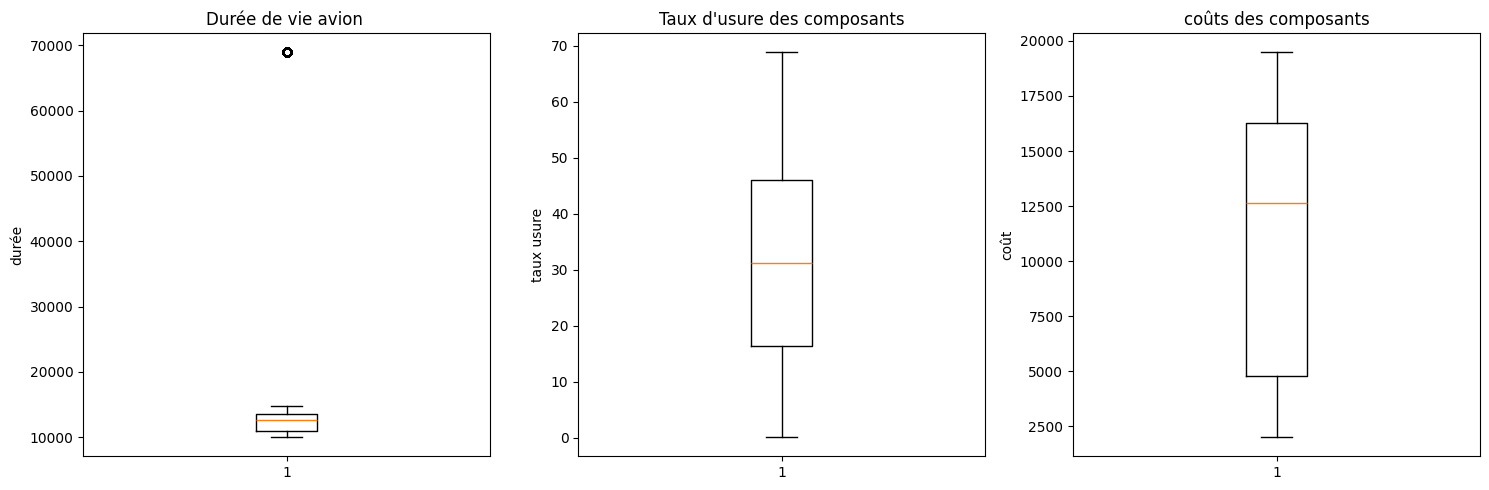

In [15]:
# Your code here :
plt.figure(figsize=(15, 5))

# Boxplot pour les lifespan
plt.subplot(131)
plt.boxplot(df_compo["lifespan"])
plt.title('Durée de vie avion ')
plt.ylabel('durée')

# Boxplot pour les taux d'usure
plt.subplot(132)
plt.boxplot(df_compo["taux_usure_actuel"])
plt.title("Taux d'usure des composants")
plt.ylabel('taux usure')

# Boxplot pour les coûts
plt.subplot(133)
plt.boxplot(df_compo["cout"])
plt.title("coûts des composants")
plt.ylabel('coût')

# Affichage des boxplots
plt.tight_layout()
plt.show()

In [100]:
indx = df_compo['lifespan'].idxmax()
df_compo.loc[indx]

# Vérifier la cohérence avec la date de service de aeronefs
# Mise en service : 2015-12-26	last_maint : 2024-06-01 00:00:00

index                                   717
ref_compo              HUBA320-A320_1884-42
categorie            Composants Secondaires
aero                              A320_1884
desc                                Hublots
lifespan                              68978
taux_usure_actuel                 21.496196
cout                                   3593
Name: 2541, dtype: object

In [ ]:
####################################          TEST    #################################

In [50]:
# Test doublon
df_compo.loc[df_compo["ref_compo"]=='AUTE170-E170_5551-4'][['ref_compo','taux_usure_actuel']]	

,ref_compo,taux_usure_actuel
1804,AUTE170-E170_5551-4,24.763782
10354,AUTE170-E170_5551-4,49.050000


In [13]:
# Test doublon
df_compo.loc[df_compo.duplicated(subset="ref_compo") == True][['ref_compo','taux_usure_actuel']]

,ref_compo,taux_usure_actuel
10350,REAE170-E170_5551-0,9.80
10351,REAE170-E170_5551-1,17.28
10352,SYSE170-E170_5551-2,41.10
10353,ORDE170-E170_5551-3,20.60
10354,AUTE170-E170_5551-4,49.05
10355,SYSE170-E170_5551-5,32.10
10356,RADE170-E170_5551-6,41.98
10357,SYSE170-E170_5551-7,15.04
10358,SYSE170-E170_5551-8,50.61
10359,SYSE170-E170_5551-9,46.62


In [ ]:
######################## TEST POUR VERIFIER SI ref_compo A LA MÊME REF QUE LA COLONNE aero

In [68]:
df = df_compo
df[["ref","AERO",'num']]=df['ref_compo'].str.split(pat="-", expand=True)

In [69]:
df.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout,ref,AERO,num
695,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524,23.392968,10290,AILA320,A320_1884,20
9740,AILA320-A320_1930-20,Composants Majeurs,A320_1930,Ailerons,10524,25.917596,10290,AILA320,A320_1930,20
9785,AILA320-A320_2237-20,Composants Majeurs,A320_2237,Ailerons,10524,59.524060,10290,AILA320,A320_2237,20
8300,AILA320-A320_2497-20,Composants Majeurs,A320_2497,Ailerons,10524,21.065544,10290,AILA320,A320_2497,20
4835,AILA320-A320_2562-20,Composants Majeurs,A320_2562,Ailerons,10524,16.346724,10290,AILA320,A320_2562,20


In [70]:
df.loc[df['aero'] != df['AERO']]

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout,ref,AERO,num
